# Chapitre 5 Deep Learning [IAS](https://www.ias.sn/)
# **Reconnaissance des Panneaux de signalisation**
# Classification d'images du jeu de données [**GTSRB**](https://benchmark.ini.rub.de/gtsrb_news.html) avec Keras et TensorFlow utilisant la Convolution Neural Network CNN. 

Auteur: [Papa Séga WADE](https://solo.to/mathspsw) 


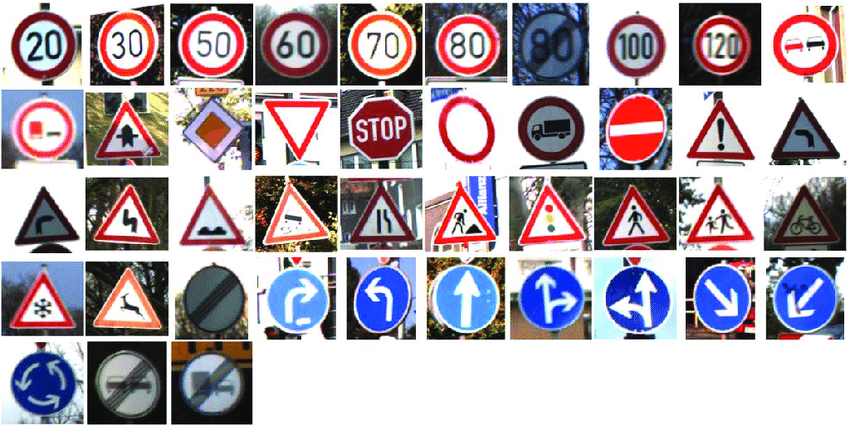

In [ ]:
## Importation des librairies de python 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from PIL import Image
import warnings
from PIL import Image
import zipfile
import tensorflow_hub as hub
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
np.random.seed(0)
tf.random.set_seed(0)

# Chargement des données
- Les données consistent en plus de 50000 images de panneaux de signalisation appartenant à 43 classes différentes.
- Le dossier `Meta` contient une image de chaque classe.
- Le dossier `Train` contient plus de 39000 images pour l'entraînement et le dossier `Test` contient environ 12000 images.
- Les fichiers csv contiennent la dimension de l'image, son chemin et le label correspondant.

Vous pouvez trouvez les données dans le site du projet GTSRB ou sur kaggle. 
 ([website](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset), [kaggle](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign))

 # **Cependant le plus simple est de recupérer les données depuis ce lien de Drive que j'ai crée car j'ai déjà converti les images du format d'origne .ppm en .jpeg [Drive datasets by PSW](https://drive.google.com/drive/folders/1t43GSfoWpR68SG8SNgP0A-52kacCS8AI)**

In [ ]:
# importation de fichiers CSV 
from google.colab import files 
files.upload()

Saving Train.csv to Train.csv
Saving Test.csv to Test.csv
Saving Meta.csv to Meta.csv


{'Meta.csv': b'Path,ClassId,ShapeId,ColorId,SignId\nMeta/27.png,27,0,0,1.32\nMeta/0.png,0,1,0,3.29\nMeta/1.png,1,1,0,3.29\nMeta/10.png,10,1,0,3.27\nMeta/11.png,11,0,0,1.22\nMeta/12.png,12,2,2,2.3\nMeta/13.png,13,4,0,2.1\nMeta/14.png,14,3,0,2.2\nMeta/15.png,15,1,0,3.1\nMeta/16.png,16,1,0,3.3\nMeta/17.png,17,1,0,3.21\nMeta/18.png,18,0,0,1.39\nMeta/19.png,19,0,0,1.2\nMeta/2.png,2,1,0,3.29\nMeta/20.png,20,0,0,1.1\nMeta/21.png,21,0,0,1.3.2\nMeta/22.png,22,0,0,1.1\nMeta/23.png,23,0,0,1.13\nMeta/24.png,24,0,0,1.5.2\nMeta/25.png,25,0,0,1.37\nMeta/26.png,26,0,0,1.24\nMeta/28.png,28,0,0,1.33\nMeta/29.png,29,0,0,1.34\nMeta/3.png,3,1,0,3.29\nMeta/30.png,30,0,0,None\nMeta/31.png,31,0,0,1.36\nMeta/32.png,32,1,3,3.42\nMeta/33.png,33,1,1,4.2\nMeta/34.png,34,1,1,4.3\nMeta/35.png,35,1,1,4.1\nMeta/36.png,36,1,1,4.4\nMeta/37.png,37,1,1,4.5\nMeta/38.png,38,1,1,4.7\nMeta/39.png,39,1,1,4.8\nMeta/4.png,4,1,0,3.29\nMeta/40.png,40,1,1,4.1\nMeta/41.png,41,1,3,3.26\nMeta/42.png,42,1,3,3.28\nMeta/5.png,5,1,0,3.29\

In [ ]:
#importation des images: Mata, Train et Test 
%%time
from zipfile import ZipFile
file_name = files.upload()

CPU times: user 142 ms, sys: 15.8 ms, total: 158 ms
Wall time: 15.3 s


### Le temps qu'il prendre sans GPU
2 fichiers
Train.zip(application/zip) - 244003877 bytes, last modified: 17/02/2022 - 100% done
Test.zip(application/zip) - 78323005 bytes, last modified: 17/02/2022 - 100% done
Saving Train.zip to Train.zip
Saving Test.zip to Test.zip
CPU times: user 2min 6s, sys: 18 s, total: 2min 24s
Wall time: 1h 9min 31s

In [ ]:
# #importation des images : train et test
%%time 
# from zipfile import ZipFile
# file_name = files.upload()

Saving Train.zip to Train.zip
Saving Test.zip to Test.zip
CPU times: user 2min 6s, sys: 18 s, total: 2min 24s
Wall time: 1h 9min 31s


In [ ]:
%%time
with zipfile.ZipFile("Meta.zip","r") as zip_ref:
        zip_ref.extractall("")
        
with zipfile.ZipFile("Train.zip","r") as zip_ref:
        zip_ref.extractall("")

with zipfile.ZipFile("Test.zip","r") as zip_ref:
        zip_ref.extractall("")

CPU times: user 8.02 s, sys: 3.88 s, total: 11.9 s
Wall time: 12.5 s


# **Preparation des données training validation et labels**

In [ ]:
path = "/content/"

In [ ]:
meta = os.listdir(path+'Meta')
meta

['21.png',
 '0.png',
 '5.png',
 '41.png',
 '31.png',
 '19.png',
 '4.png',
 '42.png',
 '33.png',
 '36.png',
 '7.png',
 '24.png',
 '28.png',
 '23.png',
 '30.png',
 '3.png',
 '38.png',
 '17.png',
 '2.png',
 '16.png',
 '22.png',
 '14.png',
 '11.png',
 '20.png',
 '37.png',
 '34.png',
 '10.png',
 '18.png',
 '25.png',
 '29.png',
 '12.png',
 '39.png',
 '8.png',
 '32.png',
 '27.png',
 '26.png',
 '6.png',
 '15.png',
 '1.png',
 '9.png',
 '13.png',
 '40.png',
 '35.png']

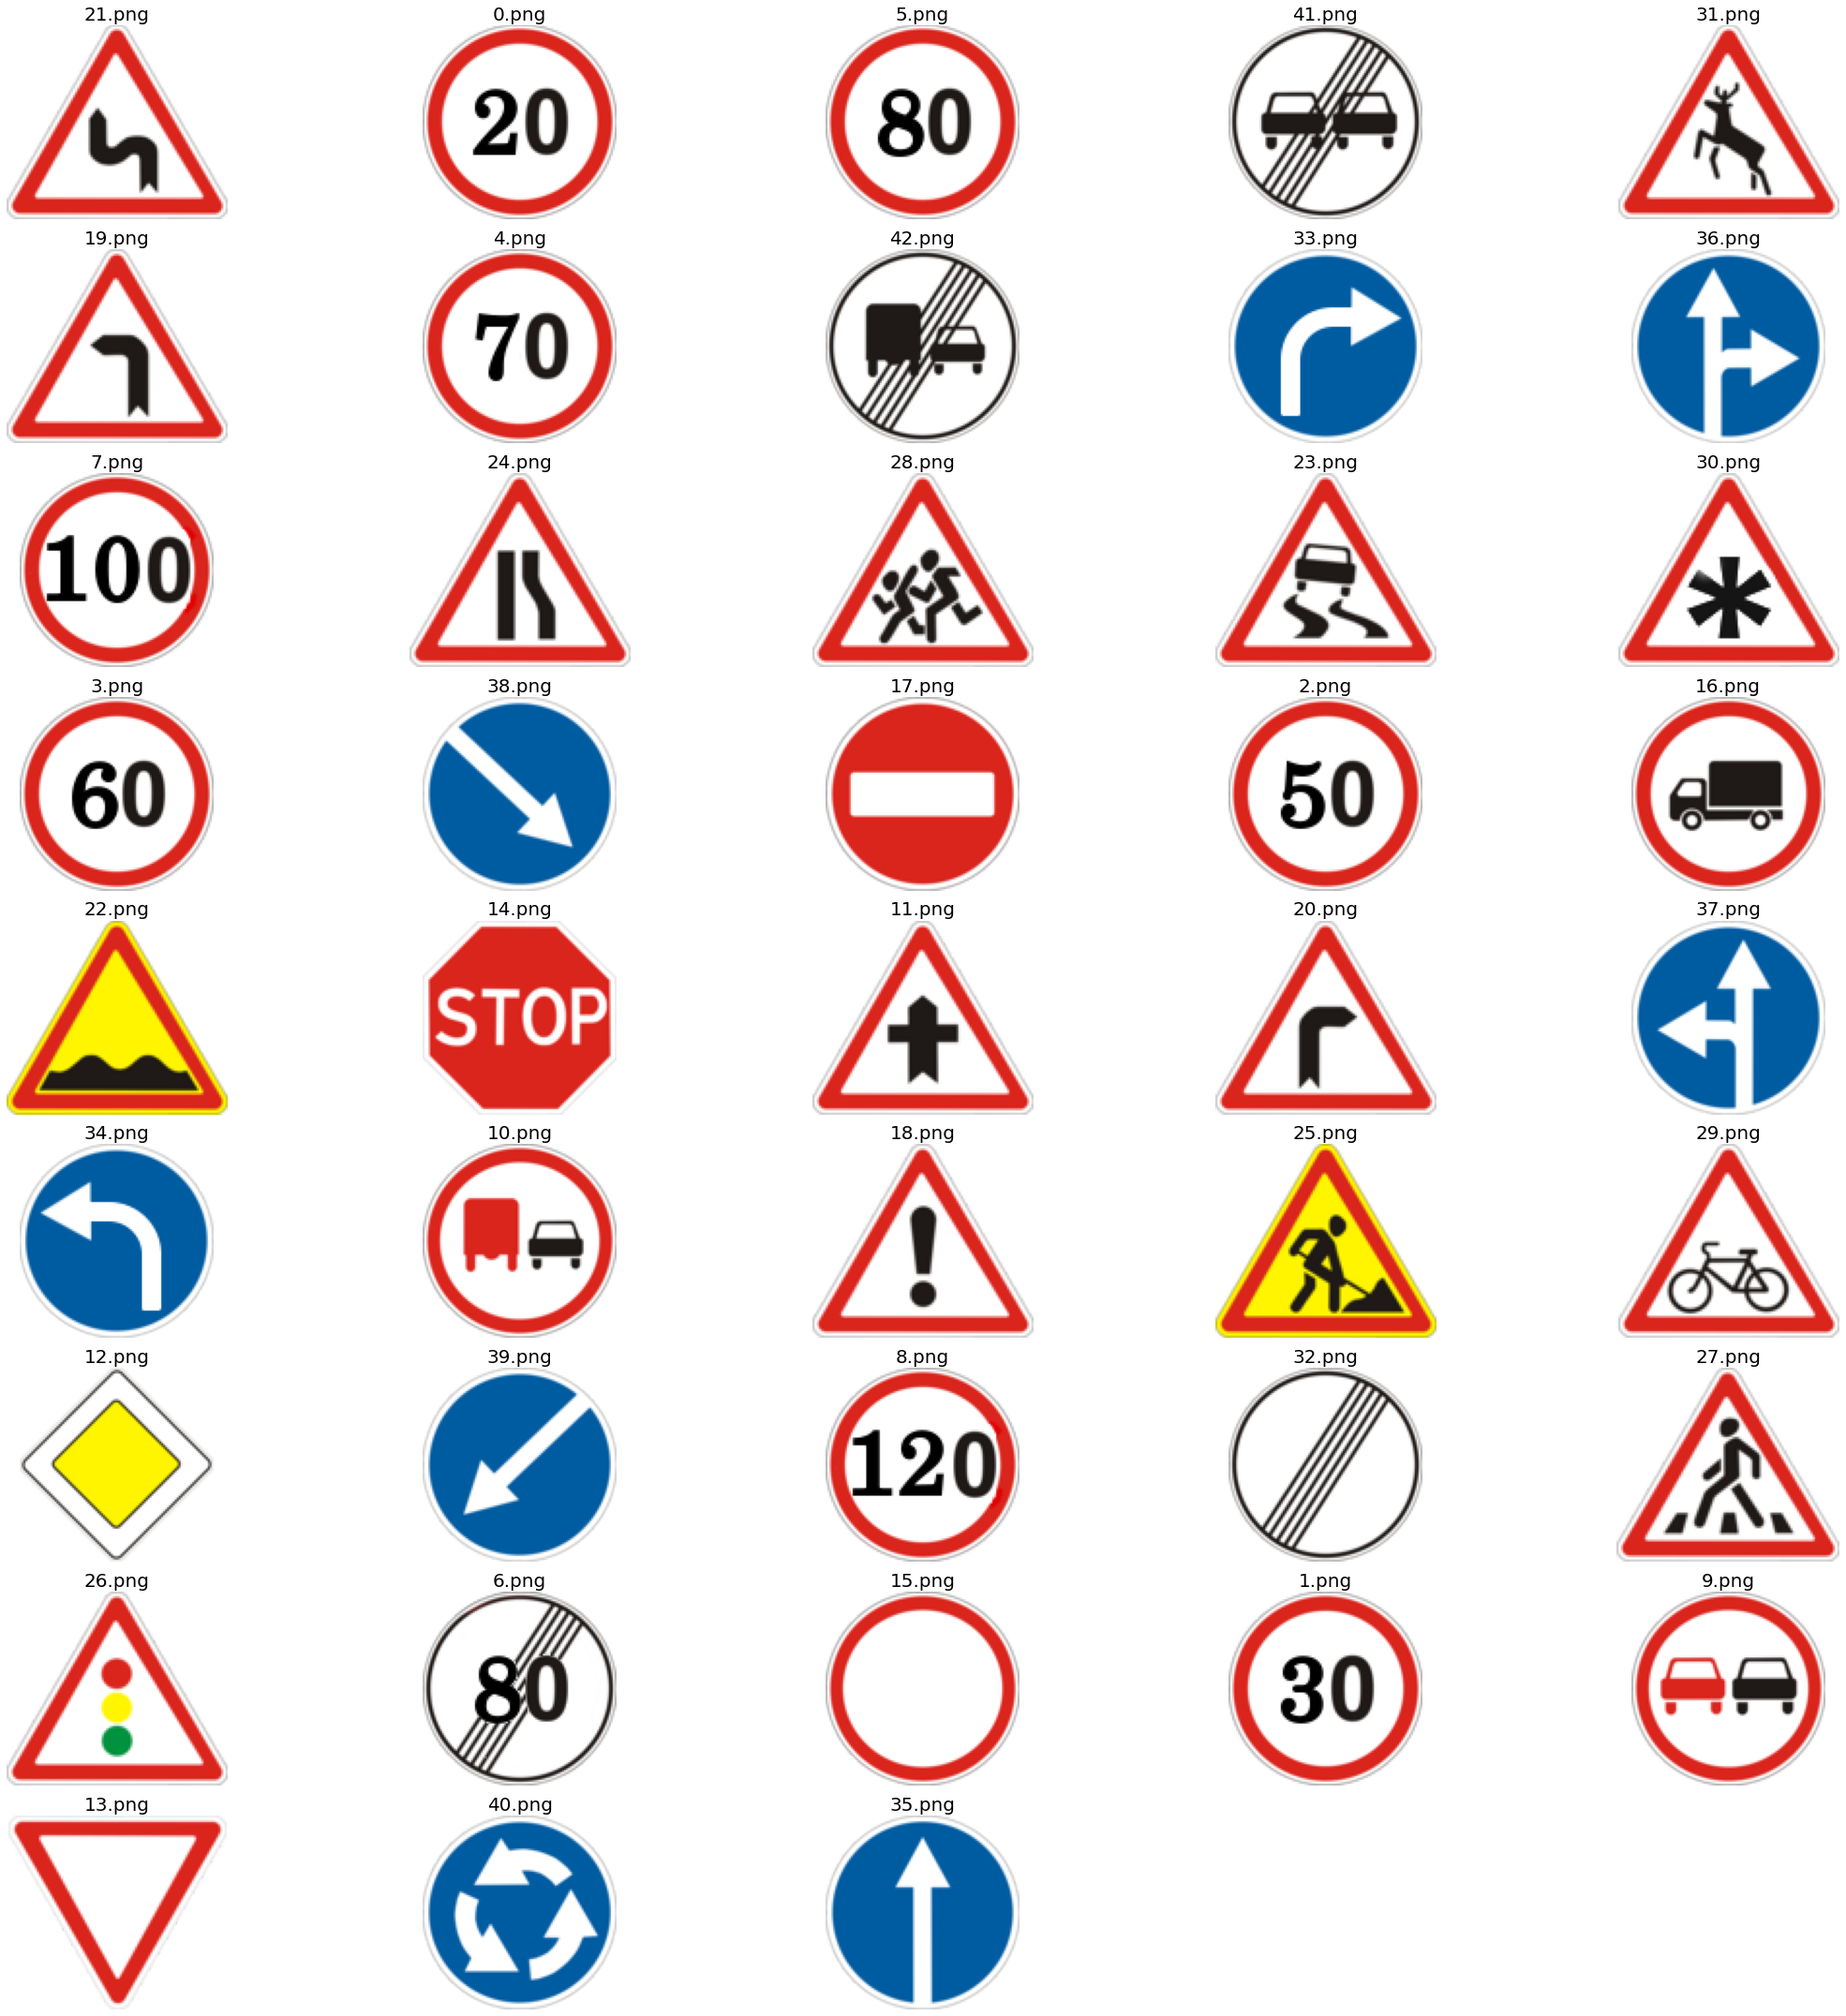

In [ ]:
## Viewing images belonging to each class

plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
    img = Image.open(path+'Meta/'+file)
    ax = plt.subplot(9,5,i+1)
    ax.imshow(img)
    ax.set_title(file, size=20)
    plt.axis('off')
plt.tight_layout()

In [ ]:
## Creating a dictionary for class labels

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
train_df = pd.read_csv(path + "Train.csv")
train_df.head()

Width  Height  Roi.X1  ...  Roi.Y2  ClassId                            Path
0     27      26       5  ...      20       20  Train/20/00020_00000_00000.png
1     28      27       5  ...      22       20  Train/20/00020_00000_00001.png
2     29      26       6  ...      21       20  Train/20/00020_00000_00002.png
3     28      27       5  ...      22       20  Train/20/00020_00000_00003.png
4     28      26       5  ...      21       20  Train/20/00020_00000_00004.png

[5 rows x 8 columns]

In [ ]:
train_df.describe()

Width        Height  ...        Roi.Y2       ClassId
count  39209.000000  39209.000000  ...  39209.000000  39209.000000
mean      50.835880     50.328930  ...     44.728379     15.788390
std       24.306933     23.115423  ...     21.971145     12.013238
min       25.000000     25.000000  ...     20.000000      0.000000
25%       35.000000     35.000000  ...     30.000000      5.000000
50%       43.000000     43.000000  ...     38.000000     12.000000
75%       58.000000     58.000000  ...     52.000000     25.000000
max      243.000000    225.000000  ...    205.000000     42.000000

[8 rows x 7 columns]

# Prétraitement
- Les dimensions moyennes de toutes les images sont d'environ 50x50 pixels.
- Toutes les images sont redimensionnées à (50,50) pixels et sauvegardées comme tableau numpy.
- Les données sont normalisées et les étiquettes sont encodées en One Hot.

In [ ]:
print(f'minimum width: {train_df.Width.min()}')
print(f'minimum height: {train_df.Height.min()}')
print(f'average width: {train_df.Width.mean()}')
print(f'average height: {train_df.Height.mean()}')

minimum width: 25
minimum height: 25
average width: 50.83587951745773
average height: 50.328929582493814


In [ ]:
train_x =[]
for i in train_df.Path:
    img = Image.open(path+i)       # reading image
    img = img.resize((50,50))     # reasizing image
    train_x.append(np.array(img)) # saving image as array to train

train_y = np.array(train_df.ClassId)
train_x = np.array(train_x)
print(train_x.shape)
print(train_y.shape)

(39209, 50, 50, 3)
(39209,)


In [ ]:
test_df = pd.read_csv(path+'Test.csv')
test_df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png

In [ ]:
test_x =[]
for i in test_df.Path:
    img = Image.open(path+i)
    img = img.resize((50,50))
    test_x.append(np.array(img))

test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 50, 50, 3)
(12630,)


Dangerous curve right


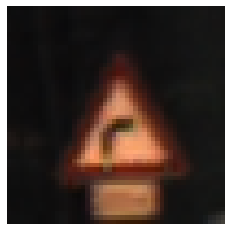

In [ ]:
print(classes[train_y[35]])
plt.imshow(train_x[35])
plt.axis('off')
plt.show()

In [ ]:
## Normalization

xtrain = train_x/255
xtest = test_x/255


# One Hot encoding

ytrain = keras.utils.to_categorical(train_y)
ytest = keras.utils.to_categorical(test_y)

# Création d'un modèle CNN
- Les données sont divisées en données de formation et de validation
- Le modèle CNN contient deux blocs, chacun contenant deux couches convolutionnelles connectées à une couche de mise en commun Max.
- Celle-ci est ensuite connectée à un CNN entièrement connecté avec des couches de dropout entre les deux.
- Le modèle est compilé avec un optimiseur SGD et une fonction de perte sous forme d'entropie croisée catégorique.


In [ ]:
## Splitting into train and validation data

from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)
print(xtrain.shape)
print(xvalid.shape)
print(ytrain.shape)
print(yvalid.shape)

(31367, 50, 50, 3)
(7842, 50, 50, 3)
(31367, 43)
(7842, 43)


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size= (5,5), strides=2, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 6, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)          102464    
                                                        

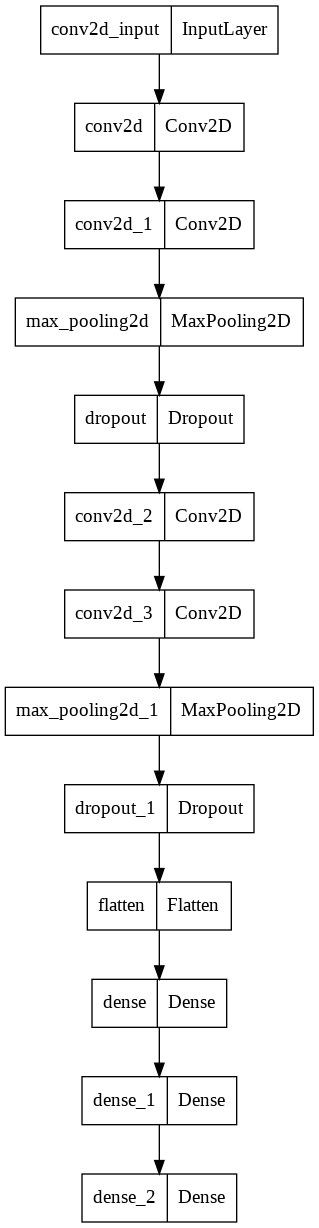

In [ ]:
keras.utils.plot_model(model)

In [ ]:
# Compiling the CNN model
model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
## Fitting the model, with early stopping callback
%%time
earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights =True)

model_history = model.fit(xtrain,ytrain, epochs=50,
                         validation_data=(xvalid,yvalid),
                         callbacks=[earlystop_cb])

Epoch 1/50
981/981 [==============================] - 25s 13ms/step - loss: 3.5653 - accuracy: 0.0644 - val_loss: 3.4716 - val_accuracy: 0.0843
Epoch 2/50
981/981 [==============================] - 11s 11ms/step - loss: 3.3780 - accuracy: 0.1133 - val_loss: 3.0893 - val_accuracy: 0.2045
Epoch 3/50
981/981 [==============================] - 13s 13ms/step - loss: 2.4672 - accuracy: 0.3088 - val_loss: 1.9047 - val_accuracy: 0.4032
Epoch 4/50
981/981 [==============================] - 12s 12ms/step - loss: 1.4594 - accuracy: 0.5468 - val_loss: 1.1582 - val_accuracy: 0.6575
Epoch 5/50
981/981 [==============================] - 11s 11ms/step - loss: 1.0137 - accuracy: 0.6763 - val_loss: 0.9197 - val_accuracy: 0.7048
Epoch 6/50
981/981 [==============================] - 10s 10ms/step - loss: 0.7905 - accuracy: 0.7451 - val_loss: 0.4404 - val_accuracy: 0.8653
Epoch 7/50
981/981 [==============================] - 10s 10ms/step - loss: 0.6301 - accuracy: 0.7952 - val_loss: 0.4088 - val_accuracy:

In [ ]:
model.save('model_with_padding.h5')

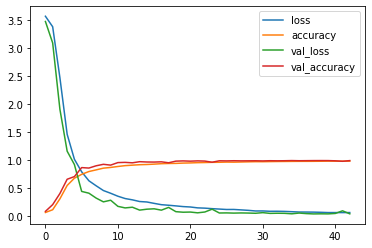

In [ ]:
pd.DataFrame(model_history.history).plot()

# Evaluating model performance and making predictions of model 

In [ ]:
## Évaluation du modèle

loss, accuracy = model.evaluate(xtest,ytest)
print(f'Loss = {loss:.2f}\naccuracy = {accuracy*100:.2f}%')

395/395 [==============================] - 3s 6ms/step - loss: 0.3558 - accuracy: 0.9206
Loss = 0.36
accuracy = 92.06%


In [ ]:
## Making predictions

prob = model.predict(xtest)
pred = np.argmax(prob, axis=-1)


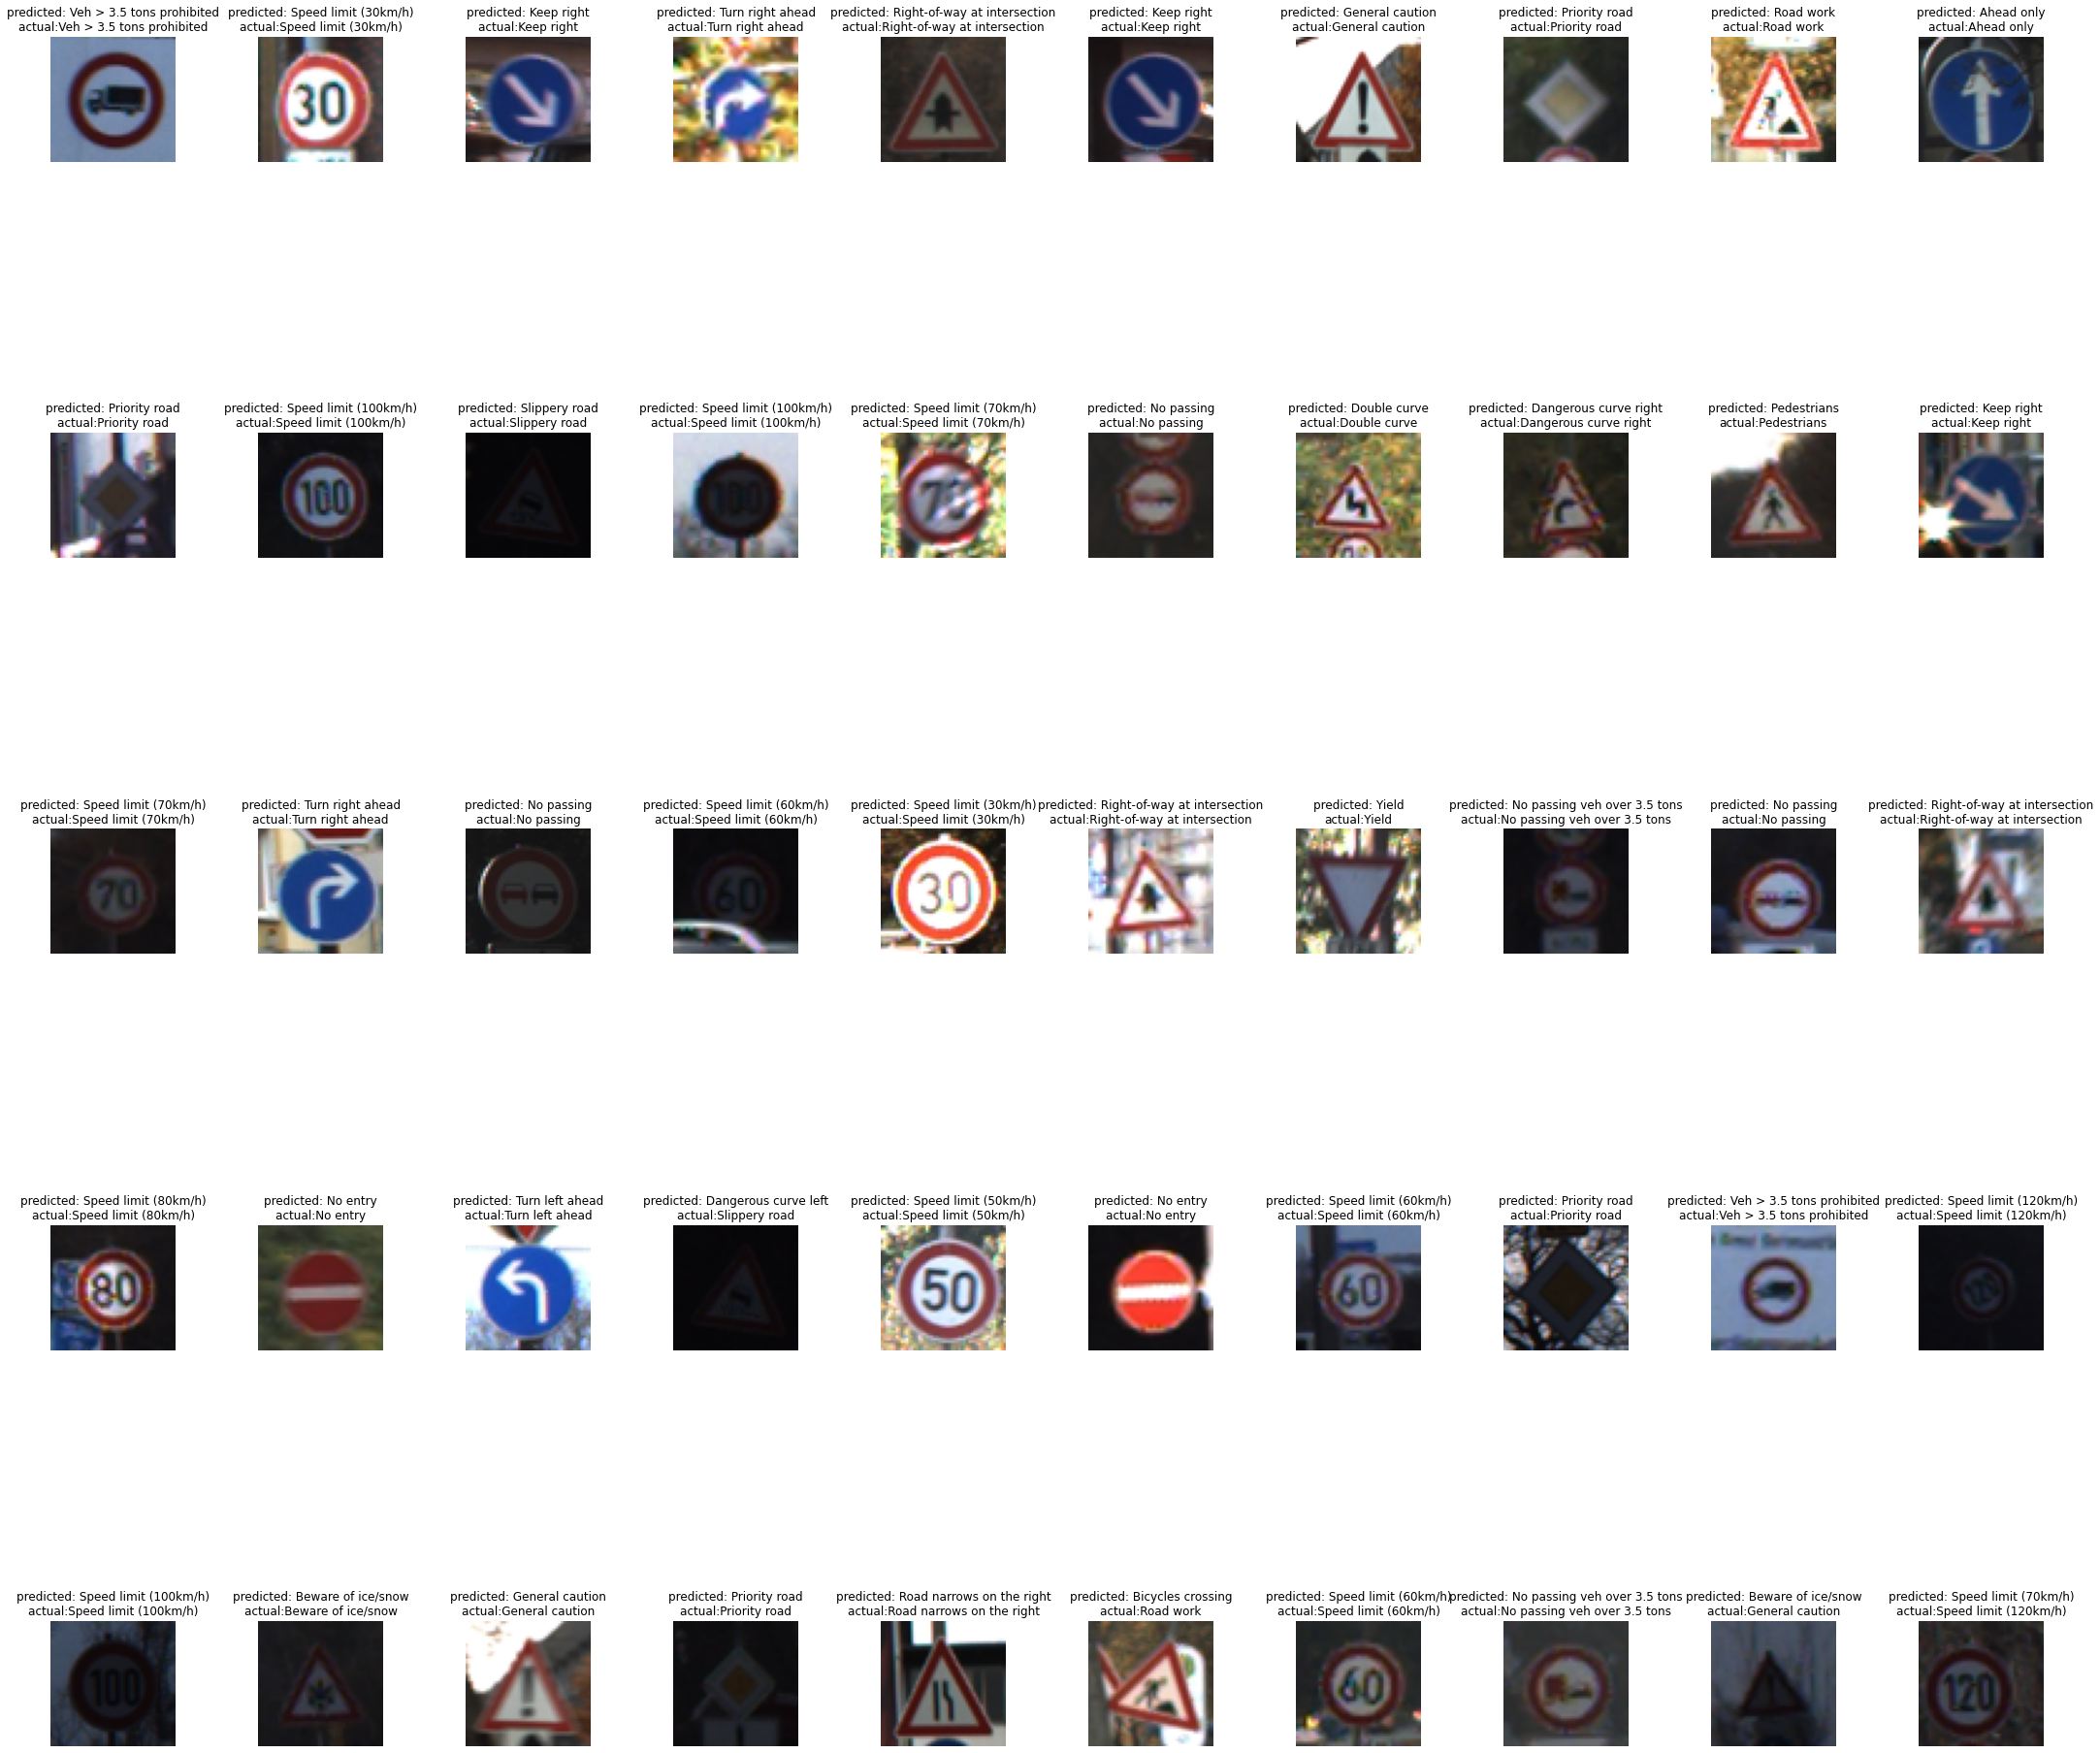

In [ ]:
# print(prob[1])
plt.figure(figsize=(30,30))
for i in range(50):
    ax = plt.subplot(5,10,i+1)
    ax.imshow(xtest[i])
    ax.set_title(f'predicted: {classes[pred[i]]}\nactual:{classes[test_y[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Un 2ème Modèle sans padding**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D,BatchNormalization

In [ ]:
model2 = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(50,50,3)),
    Conv2D(32, (3,3)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPool2D(2,2),
    Dropout(0.2),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPool2D(2,2),
    #Dropout(0.2),
    Flatten(),
    Dense(256),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dropout(0.4),
    Dense(43, activation='softmax')
])

In [ ]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 44, 44, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 44, 44, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 22, 22, 32)       

In [ ]:
epochs = 15
history = model2.fit(
    xtrain,
    ytrain,
    batch_size=32,
    epochs=epochs,
    validation_data=(xvalid,yvalid)
)

Epoch 1/15
981/981 [==============================] - 21s 20ms/step - loss: 0.3863 - acc: 0.9070 - val_loss: 0.0502 - val_acc: 0.9860
Epoch 2/15
981/981 [==============================] - 18s 18ms/step - loss: 0.0515 - acc: 0.9879 - val_loss: 0.0390 - val_acc: 0.9895
Epoch 3/15
981/981 [==============================] - 19s 20ms/step - loss: 0.0283 - acc: 0.9930 - val_loss: 0.0187 - val_acc: 0.9943
Epoch 4/15
981/981 [==============================] - 18s 18ms/step - loss: 0.0243 - acc: 0.9934 - val_loss: 0.0121 - val_acc: 0.9972
Epoch 5/15
981/981 [==============================] - 18s 19ms/step - loss: 0.0171 - acc: 0.9953 - val_loss: 0.0344 - val_acc: 0.9889
Epoch 6/15
981/981 [==============================] - 18s 19ms/step - loss: 0.0175 - acc: 0.9947 - val_loss: 0.0383 - val_acc: 0.9893
Epoch 7/15
981/981 [==============================] - 19s 19ms/step - loss: 0.0136 - acc: 0.9955 - val_loss: 0.0133 - val_acc: 0.9966
Epoch 8/15
981/981 [==============================] - 18s 19ms

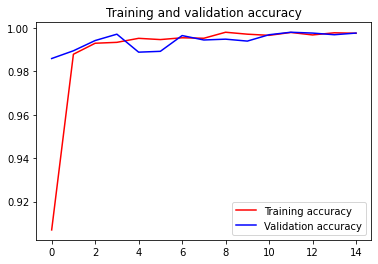

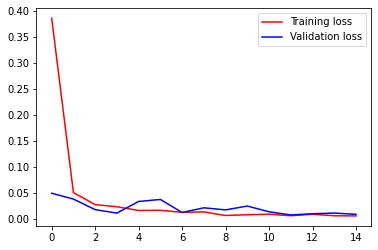

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.plot(acc, 'r', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

In [ ]:
loss2, accuracy2 = model2.evaluate(xtest,ytest)
print(f'Loss = {loss2:.2f}\naccuracy = {accuracy2*100:.2f}%')

395/395 [==============================] - 4s 11ms/step - loss: 0.0734 - acc: 0.9845
Loss = 0.07
accuracy = 98.45%


***

***
 **EXERCICE EN MINI PROJET**

> En utilisant le même jeu de données sur Google colab


> Vous allez implémenter les deux types d'acritecture historique en Deep Learning 




***

***

# **Mini projet** 

Implementer le modèle **LeNet** et **AlexNet** et faire une comparaison des deux termes de **LOSS** et **Accuracy**.

/!\ Faites attention à la taille des inputs !!!!

## **Bon courage**


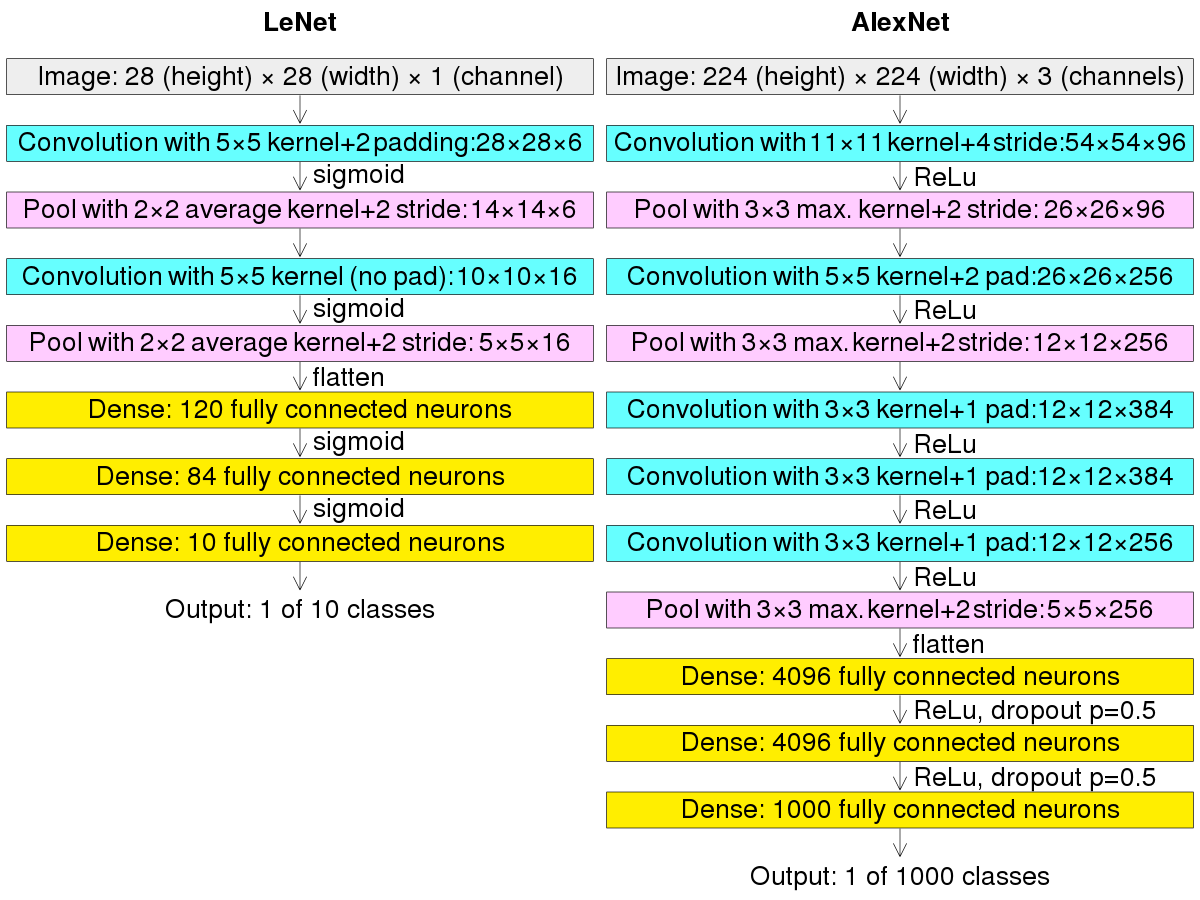
